In [35]:
import glob
import os
import pandas as pd
import numpy as np

## Prepare Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Machine learning model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Machine learning model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

## plot graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [121]:
# # Ścieżka do folderu z plikami
# folder_path = "data2/"

# # Wzorzec do wyszukiwania plików
# file_pattern = os.path.join(folder_path, "*.pcap_ISCX.csv")
# files = glob.glob(file_pattern)

# # Sprawdź, czy pliki zostały znalezione
# files

In [168]:
# # Inicjalizacja pustej listy na DataFrame'y
# dataframes = []

# # Iteracja przez znalezione pliki i ładowanie ich do DataFrame'ów
# for file in files:
#     df = pd.read_csv(file, encoding='utf-8')  # Wczytaj plik CSV
#     dataframes.append(df)   # Dodaj DataFrame do listy

# # Łączenie wszystkich DataFrame'ów w jeden
# combined_data = pd.concat(dataframes, ignore_index=True)
# combined_data

In [36]:
### DDoS Data
pdData = pd.read_csv('data2/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [37]:
# ## Remove the spaces before the column name
pdData.columns = pdData.columns.str.strip()
len(pdData)

225745

# Data Preprocessing

In [38]:
## Convert inf values to NaN
pdData.replace([np.inf, -np.inf], np.nan, inplace=True)

# Delete rows with missing values
pdData.dropna(inplace=True)
len(pdData)

225711

In [39]:
## Types of the columns
(pdData.dtypes=='object')

Destination Port               False
Flow Duration                  False
Total Fwd Packets              False
Total Backward Packets         False
Total Length of Fwd Packets    False
                               ...  
Idle Mean                      False
Idle Std                       False
Idle Max                       False
Idle Min                       False
Label                           True
Length: 79, dtype: bool

In [40]:

## Convert Label to numerical values - Benign in the context of personal data means “non-malignant"
pdData['Label'] = pdData['Label'].apply(lambda x: 0 if x == "BENIGN" else 1)

In [41]:
pdData.loc[:,'Label'].unique()

array([0, 1])

# Visualization Data

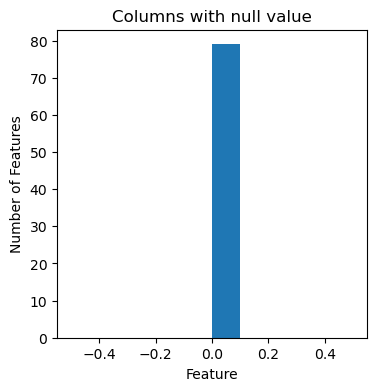

In [42]:
plt.figure(1, figsize=(4,4))
plt.hist(pdData.isna().sum())

plt.title('Columns with null value')
plt.xlabel('Feature')
plt.ylabel('Number of Features')

plt.show()

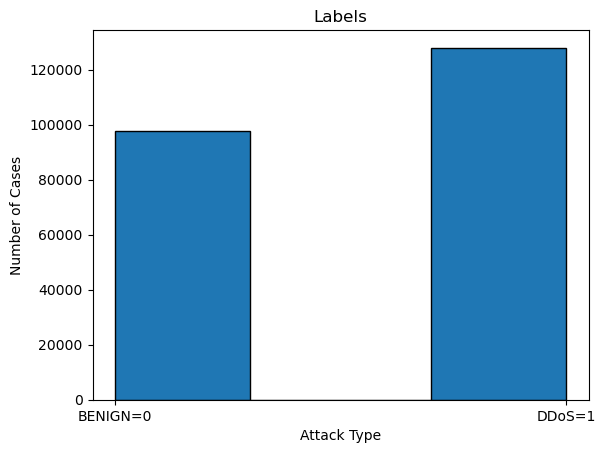

In [43]:

## Print DataFrame
plt.hist(pdData['Label'], bins=[0, 0.3, 0.7, 1], edgecolor='black')

# Ustawienie etykiet na osi X
plt.xticks([0, 1], labels=['BENIGN=0', 'DDoS=1'])

# Dodanie tytułu i etykiet osi
plt.title('Labels')
plt.xlabel('Attack Type')
plt.ylabel('Number of Cases')

# Wyświetlenie wykresu
plt.show()

In [44]:
## Describe
pdData.describe()

Destination Port  Flow Duration  Total Fwd Packets  \
count     225711.000000   2.257110e+05      225711.000000   
mean        8876.556769   1.624410e+07           4.875389   
std        19752.018851   3.152612e+07          15.423986   
min            0.000000  -1.000000e+00           1.000000   
25%           80.000000   7.123800e+04           2.000000   
50%           80.000000   1.453164e+06           3.000000   
75%           80.000000   8.806652e+06           5.000000   
max        65532.000000   1.199999e+08        1932.000000   

       Total Backward Packets  Total Length of Fwd Packets  \
count           225711.000000                225711.000000   
mean                 4.573424                   939.603147   
std                 21.756929                  3249.628245   
min                  0.000000                     0.000000   
25%                  1.000000                    26.000000   
50%                  4.000000                    30.000000   
75%                  5.000000                    64.000000   
max               2942.000000                183012.000000   

       Total Length of Bwd Packets  Fwd Packet Length Max  \
count                 2.257110e+05          225711.000000   
mean                  5.961369e+03             538.615499   
std                   3.922122e+04            1864.258043   
min                   0.000000e+00               0.000000   
25%                   0.000000e+00               6.000000   
50%                   1.640000e+02              20.000000   
75%                   1.160100e+04              34.000000   
max                   5.172346e+06           11680.000000   

       Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
count          225711.000000           225711.000000          225711.000000   
mean               27.885810              164.850580             214.939117   
std               163.336194              504.927243             797.466898   
min                 0.000000                0.000000               0.000000   
25%                 0.000000                6.000000               0.000000   
50%                 0.000000                8.666667               5.301991   
75%                 6.000000               32.000000              10.263203   
max              1472.000000             3867.000000            6692.644993   

       ...  min_seg_size_forward   Active Mean    Active Std    Active Max  \
count  ...         225711.000000  2.257110e+05  2.257110e+05  2.257110e+05   
mean   ...             21.482338  1.848539e+05  1.293631e+04  2.081162e+05   
std    ...              4.166228  7.979819e+05  2.102894e+05  9.002992e+05   
min    ...              0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
25%    ...             20.000000  0.000000e+00  0.000000e+00  0.000000e+00   
50%    ...             20.000000  0.000000e+00  0.000000e+00  0.000000e+00   
75%    ...             20.000000  1.879000e+03  0.000000e+00  1.879000e+03   
max    ...             52.000000  1.000000e+08  3.950000e+07  1.000000e+08   

         Active Min     Idle Mean      Idle Std      Idle Max      Idle Min  \
count  2.257110e+05  2.257110e+05  2.257110e+05  2.257110e+05  2.257110e+05   
mean   1.776468e+05  1.032370e+07  3.612487e+06  1.288007e+07  7.756523e+06   
std    7.843163e+05  2.185431e+07  1.275778e+07  2.692283e+07  1.983236e+07   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    1.863000e+03  8.241416e+06  0.000000e+00  8.254452e+06  7.423865e+06   
max    1.000000e+08  1.200000e+08  6.530000e+07  1.200000e+08  1.200000e+08   

               Label  
count  225711.000000  
mean        0.567208  
std         0.495464  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         1.000000  

[8 rows x 79 

In [45]:
## Show each columns

# plt.figure(5)
# for col in pdData.columns:
#     plt.hist(pdData[col])
#     plt.title(col)
#     plt.show()

# Data splitting into training and test

In [46]:
## Feature and Target variable
X = pdData.drop('Label', axis=1)
Y = pdData['Label']

## Convert to numPy array
x1 = np.array(X).astype(np.float64)
y1 = np.array(Y)

## Always check dataset length
assert len(X) == len(Y), "Długości zestawów cech i etykiet nie są zgodne."

In [47]:
## Split data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

## Check
train_persent = len(X_train) / len(pdData) * 100
test_percent = len(X_test) / len(pdData) * 100

print("Train", train_persent)
print("Test", test_percent)

Train 69.99968986890316
Test 30.000310131096846


In [48]:
print("Train dataset size", X_train.shape)
print("Test dataset size", X_test.shape)

Train dataset size (157997, 78)
Test dataset size (67714, 78)


# Training Model

## I model - Random Forest


In [49]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)
rf_pred

array([0, 0, 0, ..., 1, 1, 1])

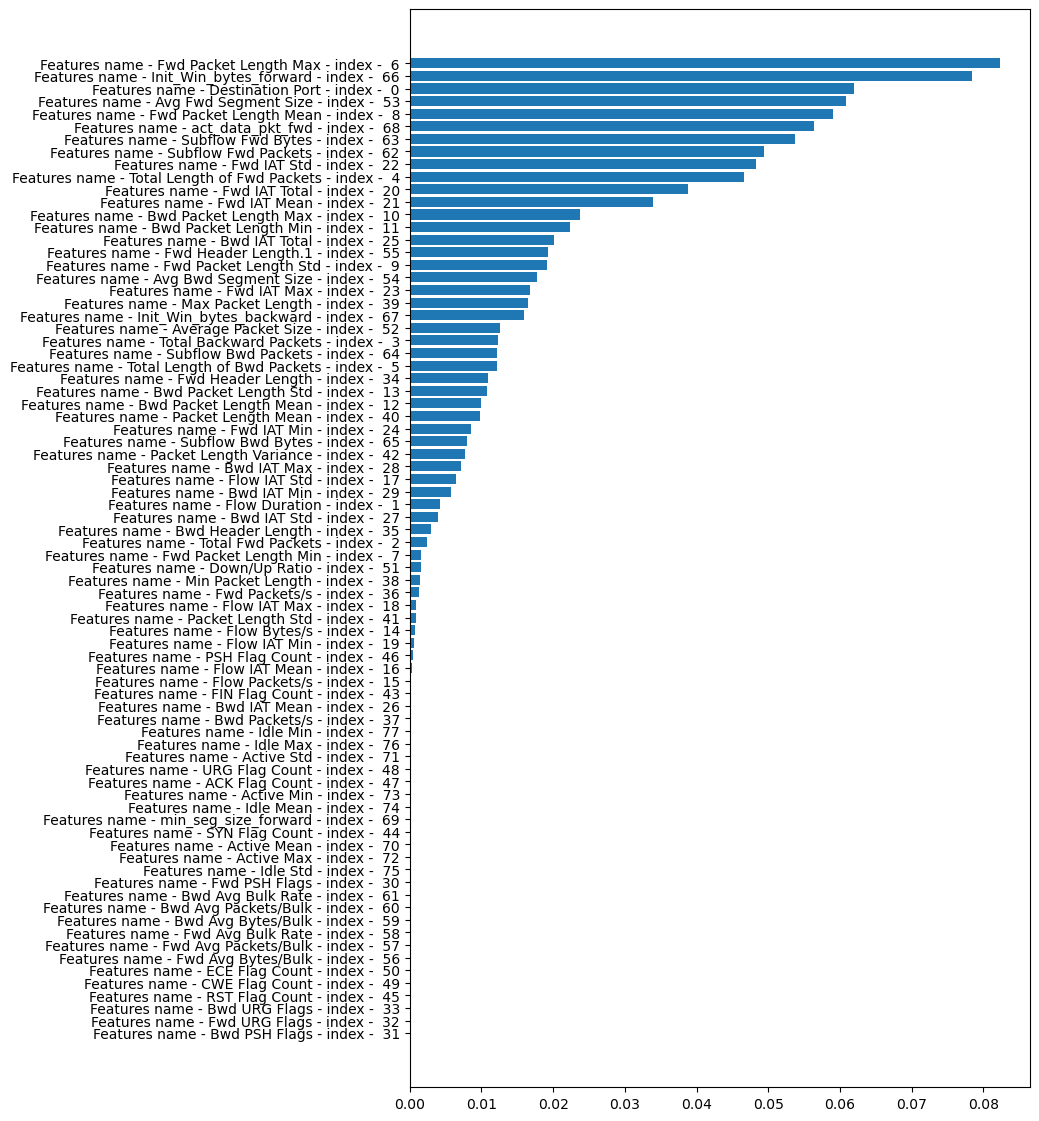

In [50]:
## importances feature from the model
importances = rf_model.feature_importances_

## sorted by importance
indexes = sorted(range(len(importances)), key=lambda i: importances[i], reverse=False)
feature_column_names = [f"Features name - {pdData.columns[i]} - index -  {i}" for i in indexes]

plt.figure(figsize=(8, 14))
plt.barh(range(X_train.shape[1]), importances[indexes], align="center")
plt.yticks(range(X_train.shape[1]), feature_column_names)
plt.show()

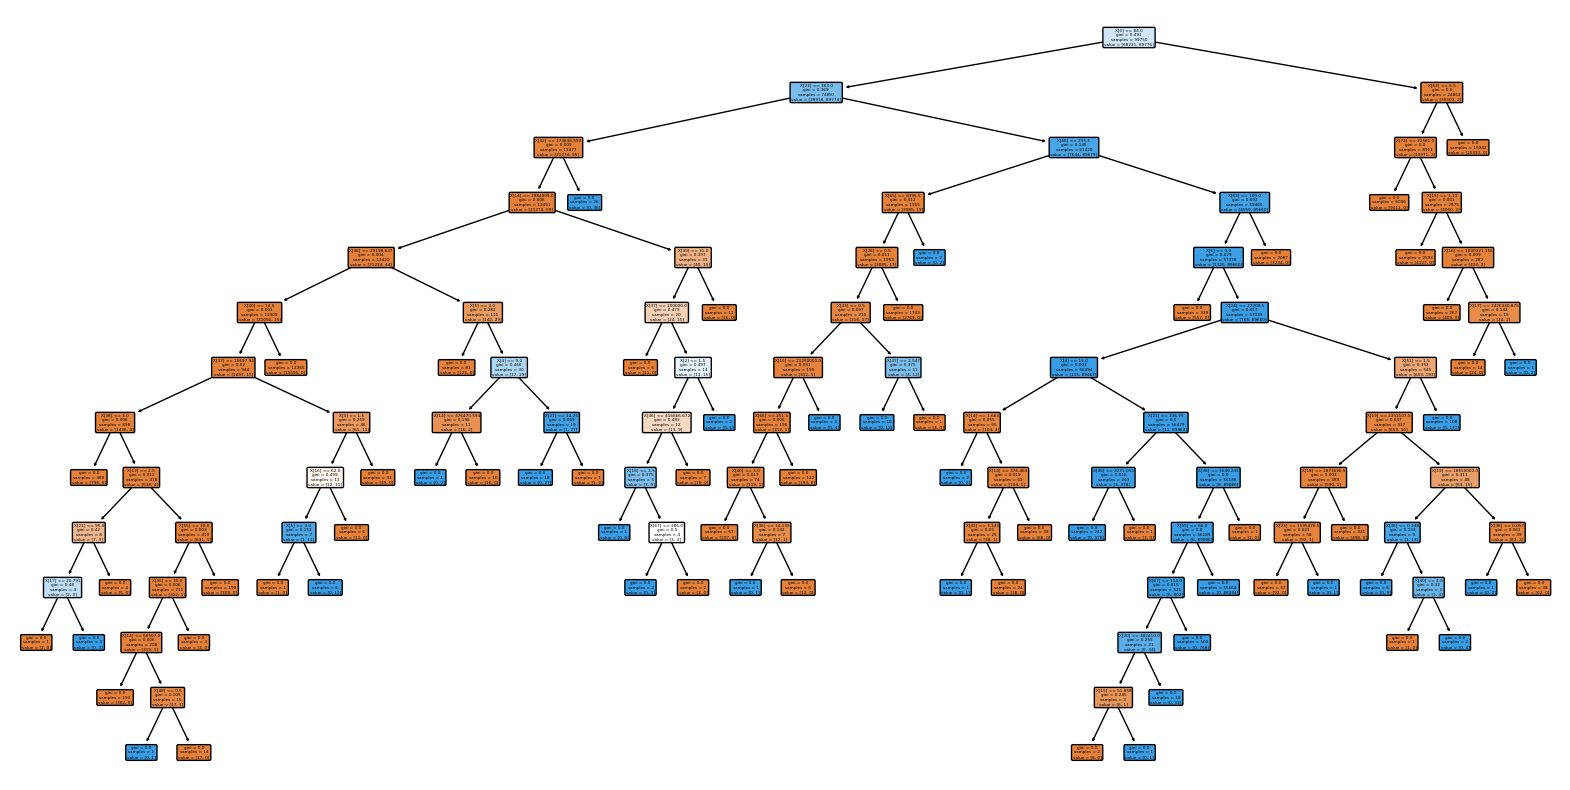

In [51]:
from sklearn.tree import plot_tree

estimator = rf_model.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, rounded=True)

plt.show()

# Model Evaluation

In [52]:
 ## Generate and display a detailed confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [104]:
rf_accuracy = accuracy_score(Y_test, rf_pred)
rf_f1 = f1_score(Y_test, rf_pred)
rf_precision = precision_score(Y_test, rf_pred)
rf_recall = recall_score(Y_test, rf_pred)

def visualizationMetrics(accuracy, f1, precision, recall):
   metrics_data = {
    'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall'],
    'Value': [accuracy, f1, precision, recall]
    }

   df_metrics = pd.DataFrame(metrics_data)
    
   print(df_metrics)

visualizationMetrics(rf_accuracy,rf_f1,rf_precision, rf_recall)

      Metric     Value
0   Accuracy  0.999897
1   F1 Score  0.999909
2  Precision  1.000000
3     Recall  0.999818


### Visualization

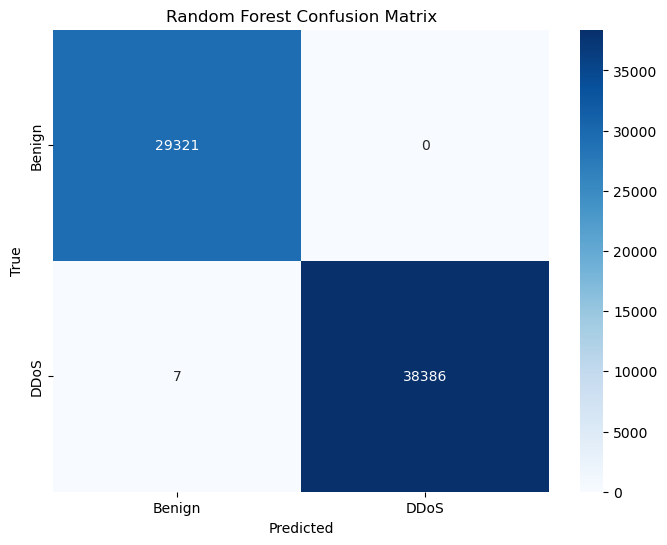

In [77]:
plot_confusion_matrix(Y_test, rf_pred, ['Benign', 'DDoS'], "Random Forest Confusion Matrix")

### II model - Logistic Regression

In [119]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, Y_train)
lr_pred = lr_model.predict(X_test)


/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluate Logistic Regression

In [120]:
lr_accuracy = accuracy_score(Y_test, lr_pred)
lr_f1 = f1_score(Y_test, lr_pred)
lr_precision = precision_score(Y_test, lr_pred)
lr_recall = recall_score(Y_test, lr_pred)

In [158]:


visualizationMetrics(lr_accuracy, lr_f1, lr_precision, lr_recall)

      Metric     Value
0   Accuracy  0.938639
1   F1 Score  0.948118
2  Precision  0.910606
3     Recall  0.988852


### Visualization

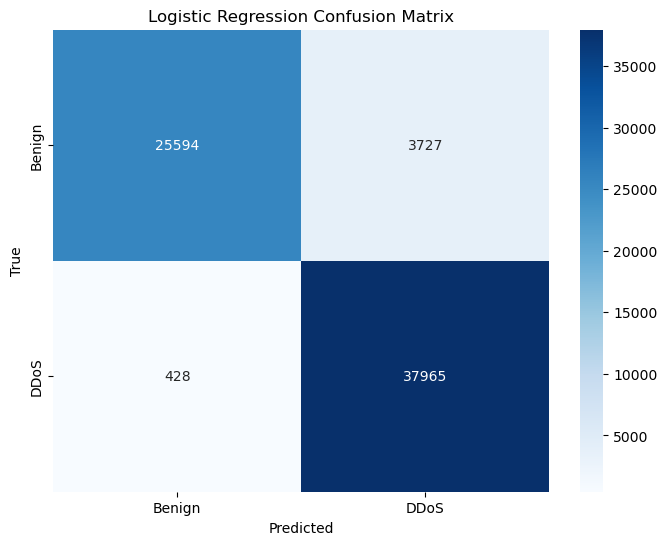

In [122]:
plot_confusion_matrix(Y_test, lr_pred, ['Benign', 'DDoS'], "Logistic Regression Confusion Matrix")

###  Neural Network

In [125]:
nn_model = MLPClassifier(hidden_layer_sizes=10, max_iter=10, random_state=42)
nn_model.fit(X_train, Y_train)
nn_pred = nn_model.predict(X_test)

/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


### Evaluate Neural Network

In [126]:
nn_accuracy = accuracy_score(Y_test, nn_pred)
nn_f1 = f1_score(Y_test, nn_pred)
nn_precision = precision_score(Y_test, nn_pred)
nn_recall = recall_score(Y_test, nn_pred)

visualizationMetrics(nn_accuracy, nn_f1, nn_precision, nn_recall)

      Metric     Value
0   Accuracy  0.983489
1   F1 Score  0.985454
2  Precision  0.984481
3     Recall  0.986430


### Visualization

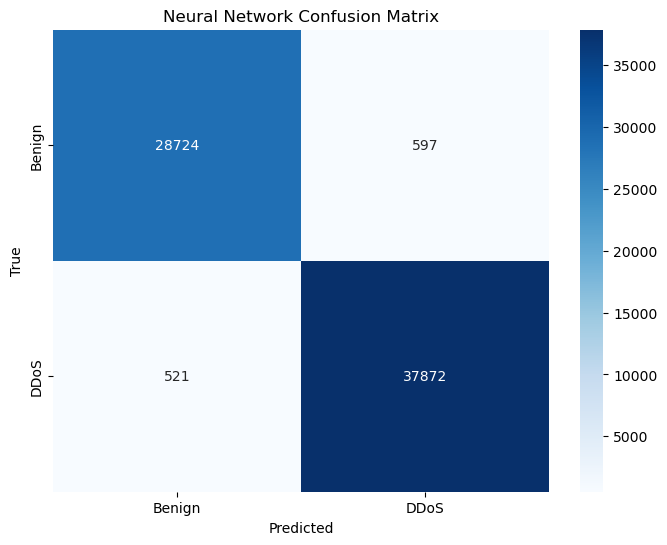

In [127]:
plot_confusion_matrix(Y_test, nn_pred, ['Benign', 'DDoS'], "Neural Network Confusion Matrix")

### Model Comparison

In [130]:

rf_proba = rf_model.predict_proba(X_test)

lr_proba = lr_model.predict_proba(X_test)

nn_proba = nn_model.predict_proba(X_test)

### Prediction for ROC Curve

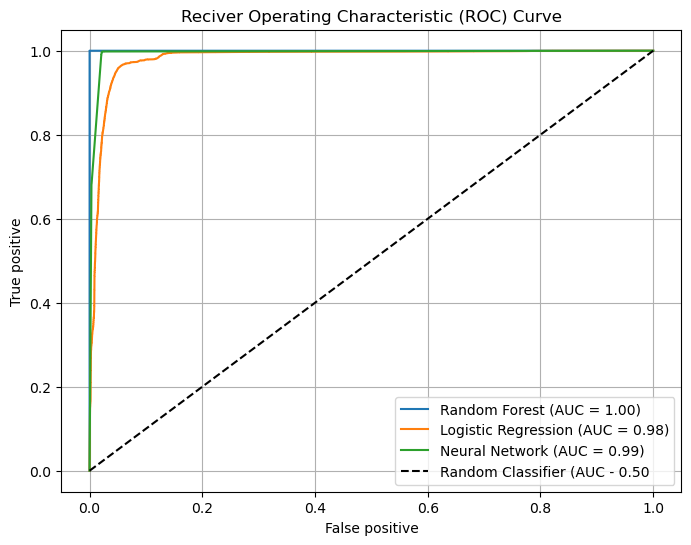

In [157]:
rf_fp ,rf_tp, _ = roc_curve(Y_test, rf_proba[:, 1])
rf_auc = auc(rf_fp, rf_tp)

lr_fp ,lr_tp, _ = roc_curve(Y_test, lr_proba[:, 1])
lr_auc = auc(lr_fp, lr_tp)

nn_fp ,nn_tp, _ = roc_curve(Y_test, nn_proba[:, 1])
nn_auc = auc(nn_fp, nn_tp)

plt.figure(figsize=(8,6))
plt.plot(rf_fp, rf_tp, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lr_fp, lr_tp, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(nn_fp, nn_tp, label=f'Neural Network (AUC = {nn_auc:.2f})')

plt.plot([0,1], [0,1], linestyle='--', color='black', label=f'Random Classifier (AUC - 0.50')

plt.xlabel('False positive')
plt.ylabel('True positive')
plt.title('Reciver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()